In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decimal
import math
import datetime
from datetime import datetime as dt
from datetime import timedelta
from tqdm import tqdm

# 1. Who are you? fhvhv

In [3]:
f1902 = pd.read_parquet("D:/Working_Place/new_uber/data/fhvhv_tripdata_2019-02.parquet")
f1902.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02867,B02867,2019-02-01 00:01:26,2019-02-01 00:02:55,2019-02-01 00:05:18,2019-02-01 00:14:57,245,251,2.45,...,0.83,0.0,NaN,0.0,7.48,Y,N,N,N,NaN
1,HV0003,B02879,B02879,2019-02-01 00:26:08,2019-02-01 00:41:29,2019-02-01 00:41:29,2019-02-01 00:49:39,216,197,1.71,...,0.70,0.0,NaN,2.0,7.93,N,N,N,N,NaN
2,HV0005,B02510,None,2019-02-01 00:48:58,NaT,2019-02-01 00:51:34,2019-02-01 01:28:29,261,234,5.01,...,3.99,0.0,NaN,0.0,35.97,N,Y,N,N,NaN
3,HV0005,B02510,None,2019-02-01 00:02:15,NaT,2019-02-01 00:03:51,2019-02-01 00:07:16,87,87,0.34,...,0.64,0.0,NaN,3.0,5.39,N,Y,N,N,NaN
4,HV0005,B02510,None,2019-02-01 00:06:17,NaT,2019-02-01 00:09:44,2019-02-01 00:39:56,87,198,6.84,...,2.16,0.0,NaN,4.0,17.07,N,Y,N,N,NaN


In [4]:
f1902.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [11]:
len(f1902)

20159102

# -1. Data processing with f1902

## 1) fhvhs license number and base number

In [7]:
f1902.hvfhs_license_num.unique()

array(['HV0003', 'HV0005', 'HV0002', 'HV0004'], dtype=object)

In [8]:
f1902.dispatching_base_num.unique()

array(['B02867', 'B02879', 'B02510', 'B02764', 'B02914', 'B02864',
       'B02875', 'B02682', 'B02617', 'B02836', 'B02887', 'B02880',
       'B02765', 'B02800', 'B02882', 'B02888', 'B02869', 'B02884',
       'B02835', 'B02878', 'B02889', 'B02871', 'B02395', 'B02866',
       'B02872', 'B02883', 'B02876', 'B02877', 'B02870', 'B02865',
       'B02512', 'B03136', None, 'B02844'], dtype=object)

In [12]:
f1902[f1902.dispatching_base_num.isna()]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
93396,HV0003,None,None,2019-02-01 06:45:21,2019-02-01 06:53:30,2019-02-01 06:55:03,2019-02-01 07:02:49,126,159,1.07,...,0.40,0.0,NaN,0.0,5.82,N,N,N,N,NaN
132706,HV0003,None,None,2019-02-01 07:03:09,2019-02-01 07:03:46,2019-02-01 07:05:42,2019-02-01 07:34:22,159,87,11.40,...,3.61,0.0,NaN,0.0,32.92,N,N,N,N,NaN
132707,HV0003,None,None,2019-02-01 07:32:07,2019-02-01 07:34:23,2019-02-01 07:37:36,2019-02-01 07:59:15,87,138,11.64,...,3.42,0.0,NaN,0.0,23.92,N,N,N,N,NaN
2291456,HV0003,None,None,2019-02-03 18:17:32,2019-02-03 18:22:40,2019-02-03 18:23:33,2019-02-03 18:29:37,247,42,1.03,...,0.76,0.0,NaN,0.0,7.97,N,N,N,N,NaN
2291457,HV0003,None,None,2019-02-03 18:26:09,2019-02-03 18:31:16,2019-02-03 18:33:58,2019-02-03 18:55:09,42,18,5.47,...,1.70,0.0,NaN,0.0,16.96,N,N,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19755736,HV0003,None,None,2019-02-28 14:25:17,2019-02-28 14:28:35,2019-02-28 14:30:13,2019-02-28 14:45:16,64,98,3.72,...,0.00,0.0,NaN,1.0,12.55,N,N,N,N,NaN
19789378,HV0003,None,None,2019-02-28 15:05:39,2019-02-28 15:07:39,2019-02-28 15:09:35,2019-02-28 15:41:03,98,205,6.47,...,0.00,0.0,NaN,0.0,16.15,Y,Y,N,N,NaN
19789379,HV0003,None,None,2019-02-28 15:12:22,2019-02-28 15:19:44,2019-02-28 15:21:52,2019-02-28 15:47:26,28,139,4.30,...,0.00,0.0,NaN,0.0,11.59,Y,Y,N,N,NaN
19824966,HV0003,None,None,2019-02-28 15:58:19,2019-02-28 15:59:17,2019-02-28 16:04:07,2019-02-28 16:07:54,218,219,0.40,...,0.00,0.0,NaN,0.0,5.39,Y,N,N,N,NaN


## 2) datetime

In [21]:
f1902[(f1902.request_datetime.isna())]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
49,HV0004,B02800,None,NaT,NaT,2019-02-01 00:06:07,2019-02-01 00:27:35,114,61,6.24,...,0.84,0.00,NaN,1.5,0.00,Y,N,N,N,NaN
64,HV0004,B02800,None,NaT,NaT,2019-02-01 00:21:03,2019-02-01 00:34:05,230,114,2.84,...,0.42,0.00,NaN,0.0,0.00,Y,N,N,N,NaN
65,HV0004,B02800,None,NaT,NaT,2019-02-01 00:40:51,2019-02-01 01:01:03,79,112,4.63,...,0.64,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
66,HV0004,B02800,None,NaT,NaT,2019-02-01 00:46:59,2019-02-01 01:23:03,137,198,8.05,...,0.55,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
85,HV0004,B02800,None,NaT,NaT,2019-02-01 00:26:12,2019-02-01 00:26:22,162,236,0.00,...,0.00,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483179,HV0004,B02800,None,NaT,NaT,2019-02-03 23:19:57,2019-02-03 23:41:35,49,89,11.03,...,1.50,0.00,NaN,0.0,0.00,Y,N,N,N,NaN
3469520,HV0004,B02800,None,NaT,NaT,2019-02-05 18:19:04,2019-02-05 18:53:21,205,76,10.16,...,0.38,0.00,NaN,2.0,24.45,Y,N,N,N,NaN
18850963,HV0004,B02800,None,NaT,NaT,2019-02-27 08:31:51,2019-02-27 08:55:26,238,230,0.00,...,0.00,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
19286468,HV0004,B02800,None,NaT,NaT,2019-02-27 20:26:55,2019-02-27 20:39:45,236,41,0.00,...,0.00,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN


In [22]:
f1902 = f1902[f1902.request_datetime.notnull()]
len(f1902)

20050204

In [24]:
f1902[f1902.request_datetime.dt.month!=2]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
11,HV0003,B02764,B02764,2019-01-31 23:58:20,2019-01-31 23:58:30,2019-02-01 00:01:11,2019-02-01 00:21:35,263,229,7.91,...,2.22,0.0,NaN,0.0,20.05,N,N,N,N,NaN
15,HV0003,B02875,B02875,2019-01-31 23:59:01,2019-02-01 00:01:00,2019-02-01 00:05:24,2019-02-01 00:17:13,255,17,2.92,...,1.02,0.0,NaN,0.0,8.53,N,N,N,N,NaN
20,HV0003,B02764,B02764,2019-01-31 23:57:50,2019-02-01 00:07:10,2019-02-01 00:12:54,2019-02-01 00:22:32,4,114,1.17,...,0.52,0.0,NaN,5.0,12.20,N,N,N,N,NaN
22,HV0003,B02617,B02617,2019-01-31 23:57:10,2019-02-01 00:00:44,2019-02-01 00:02:16,2019-02-01 00:08:58,97,17,1.36,...,0.28,0.0,NaN,0.0,1.81,Y,Y,N,N,NaN
29,HV0003,B02836,B02836,2019-01-31 23:56:37,2019-01-31 23:57:59,2019-02-01 00:00:36,2019-02-01 00:13:11,188,35,3.22,...,1.07,0.0,NaN,0.0,8.52,N,N,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23479,HV0003,B02883,B02883,2019-01-31 23:59:40,2019-02-01 00:04:27,2019-02-01 00:06:07,2019-02-01 00:23:20,218,205,4.07,...,0.71,0.0,NaN,0.0,5.97,Y,Y,N,N,NaN
23490,HV0003,B02764,B02764,2019-01-31 23:55:31,2019-01-31 23:58:06,2019-02-01 00:00:07,2019-02-01 00:25:09,39,106,6.46,...,0.97,0.0,NaN,0.0,10.61,Y,Y,N,N,NaN
23495,HV0003,B02879,B02879,2019-01-31 23:51:24,2019-01-31 23:55:42,2019-02-01 00:00:14,2019-02-01 00:13:20,181,61,2.50,...,0.72,0.0,NaN,0.0,2.76,Y,Y,N,N,NaN
23507,HV0003,B02395,B02395,2019-01-31 23:48:28,2019-01-31 23:55:45,2019-02-01 00:03:09,2019-02-01 00:19:23,235,167,4.62,...,0.00,0.0,NaN,0.0,6.29,Y,Y,N,N,NaN


In [26]:
f1902[f1902.pickup_datetime.dt.month!=2]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


In [48]:
f1902[f1902.pickup_datetime<f1902.request_datetime]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


In [49]:
f1902[f1902.dropoff_datetime<f1902.pickup_datetime]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


In [51]:
f1902[f1902.dropoff_datetime.isna()]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag


## 3) LocationID

In [52]:
f1902.PULocationID.unique()

array([245, 216, 261,  87, 198, 161, 148, 226,   7, 129, 263, 162, 258,
       255, 234, 163,   4, 113,  97,  17, 225,  39, 249, 188,  62,  71,
        42, 239, 132,  88, 158, 138,  79,  49,  82, 236, 209, 114,  76,
        37, 181, 230, 186, 256,  75,  45, 232,  68, 164,  48, 106,  13,
        89, 231, 107, 125,  33,  35,  61,  36, 159,  69,  80, 237, 170,
       244, 146, 167,  74,  78, 233, 142, 211, 116,  41, 112,  98, 246,
       218, 135,  90, 243, 212,  56, 166, 144,  66, 145,  83,  24, 238,
        67,  25,  50, 229, 179, 215,  10, 130, 133, 100, 262, 241, 217,
        40, 247, 174, 189, 228, 227,  54, 197, 257,  51, 182, 151,  77,
        85,  95, 205, 210,  14,  53, 123,  29, 168,  18, 149, 155,  91,
        21, 141, 137, 177, 117,  34,  92,  72,  65, 140,  20, 220,  86,
       260,  63,  52, 121, 115, 102,   3,  22, 143, 173,  16, 222, 196,
       127, 235, 136,  26, 183, 152,  15, 213,  47,  43,  28, 169, 134,
       240, 251, 118, 150, 108, 242, 195, 126,  94, 139, 192, 22

In [53]:
f1902.DOLocationID.unique()

array([251, 197, 234,  87, 198, 148,  21, 260, 223,  70, 229, 129,  33,
        17, 112, 137, 256, 262, 114,  48, 225,  39,  76,   7, 226,  35,
        91,  85, 142, 151,  37,  61, 108,  24, 231, 145, 211, 188, 239,
       183, 144,  36, 228, 116,  68, 186,  90, 263,  80, 162,  45,  79,
       179, 181, 165, 265,  56, 161,  50,  92, 259,  23, 177,  47, 127,
       157, 217, 170, 158, 244, 168, 119,  20,  41, 246, 102, 141, 261,
        42,  74, 143,  89, 140, 236, 135, 212, 235,  49,  83,  69, 230,
       249, 220, 107,  14,  97, 237, 166,  66,  82, 213,  75, 123, 224,
        62, 100,  88, 196, 113, 233, 218, 191, 171,  25, 241, 136, 131,
        16,  52, 255,  86, 132, 254, 174, 189, 163,  26,  22,  55, 250,
       247,  71,  95, 205, 216, 215, 232, 227,   4, 164, 257,  40,  18,
       146,  65, 149,  64, 160,  77,  32,  43,  10,  13, 130, 152, 201,
       133, 243, 238, 200, 125, 173, 180,  28, 155,  72, 258,  63, 169,
       106,  78, 182, 210, 153,  94, 208, 167, 185, 209, 121, 15

## 4) trip_miles

In [54]:
f1902[f1902.trip_miles<=0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
9847,HV0003,B02888,B02888,2019-02-01 00:55:36,2019-02-01 00:56:42,2019-02-01 00:57:54,2019-02-01 01:03:15,225,225,0.0,...,0.64,0.00,NaN,0.0,5.73,Y,N,N,N,NaN
10235,HV0003,B02875,B02875,2019-02-01 00:08:07,2019-02-01 00:09:42,2019-02-01 00:13:35,2019-02-01 00:16:04,170,164,0.0,...,0.89,0.00,NaN,0.0,7.54,N,N,N,N,NaN
14609,HV0003,B02866,B02866,2019-02-01 00:56:31,2019-02-01 00:57:17,2019-02-01 00:57:52,2019-02-01 01:00:18,79,79,0.0,...,0.64,0.00,NaN,0.0,5.39,N,N,N,N,NaN
27455,HV0003,B02764,B02764,2019-02-01 01:12:19,2019-02-01 01:12:47,2019-02-01 01:14:06,2019-02-01 01:17:14,243,243,0.0,...,0.64,0.00,NaN,0.0,5.52,N,N,N,N,NaN
30876,HV0003,B02866,B02866,2019-02-01 01:14:54,2019-02-01 01:16:44,2019-02-01 01:18:52,2019-02-01 01:21:42,14,14,0.0,...,0.00,0.00,NaN,0.0,0.00,Y,N,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20146245,HV0005,B02510,None,2019-02-28 23:13:27,NaT,2019-02-28 23:15:41,2019-02-28 23:15:47,39,39,0.0,...,0.59,0.00,NaN,0.0,5.39,N,N,N,N,NaN
20157386,HV0002,B02914,B02914,2019-02-28 23:11:24,NaT,2019-02-28 23:20:09,2019-02-28 23:26:42,260,83,0.0,...,0.49,0.00,NaN,0.0,0.00,N,N,N,N,NaN
20157387,HV0002,B02914,B02914,2019-02-28 23:27:17,NaT,2019-02-28 23:35:19,2019-02-28 23:45:53,82,82,0.0,...,0.43,0.00,NaN,0.0,0.00,N,N,N,N,NaN
20157388,HV0002,B02914,B02914,2019-02-28 23:46:04,NaT,2019-02-28 23:48:57,2019-02-28 23:55:07,82,82,0.0,...,0.52,0.00,NaN,0.0,0.00,N,N,N,N,NaN


In [55]:
f1902 = f1902[f1902.trip_miles>0]

In [58]:
f1902['trip_miles'] = f1902['trip_miles']*1.61

In [59]:
f1902.rename(columns={'trip_miles' : 'trip_distance'},inplace=True)

In [60]:
f1902.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

## 5) trip_time

In [56]:
f1902[f1902.trip_time<=0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
1521,HV0005,B02510,None,2019-02-01 00:35:19,NaT,2019-02-01 00:36:07,2019-02-01 00:36:11,22,22,0.01,...,0.53,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
10983,HV0005,B02510,None,2019-02-01 00:55:47,NaT,2019-02-01 00:56:57,2019-02-01 00:57:02,132,132,0.30,...,1.22,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
10995,HV0005,B02510,None,2019-02-01 00:34:28,NaT,2019-02-01 00:49:26,2019-02-01 00:49:59,228,181,4.39,...,0.96,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
11295,HV0005,B02510,None,2019-02-01 00:46:45,NaT,2019-02-01 00:49:39,2019-02-01 00:50:31,132,132,2.11,...,0.64,0.00,NaN,0.0,5.39,N,Y,N,N,NaN
12243,HV0005,B02510,None,2019-02-01 00:39:43,NaT,2019-02-01 00:54:06,2019-02-01 00:54:10,61,61,3.83,...,0.76,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20145431,HV0005,B02510,None,2019-02-28 23:19:41,NaT,2019-02-28 23:23:21,2019-02-28 23:23:49,123,123,0.13,...,0.68,0.00,NaN,0.0,0.00,Y,N,N,N,NaN
20153808,HV0005,B02510,None,2019-02-28 23:01:31,NaT,2019-02-28 23:04:32,2019-02-28 23:05:12,132,132,0.34,...,0.64,0.00,NaN,0.0,5.39,N,N,N,N,NaN
20154221,HV0005,B02510,None,2019-02-28 23:31:52,NaT,2019-02-28 23:35:32,2019-02-28 23:35:34,132,132,0.64,...,1.10,0.00,NaN,0.0,0.00,Y,N,N,N,NaN
20156627,HV0005,B02510,None,2019-02-28 23:09:25,NaT,2019-02-28 23:12:15,2019-02-28 23:12:23,45,45,0.47,...,2.29,0.75,NaN,0.0,0.00,Y,N,N,N,NaN


<AxesSubplot:>

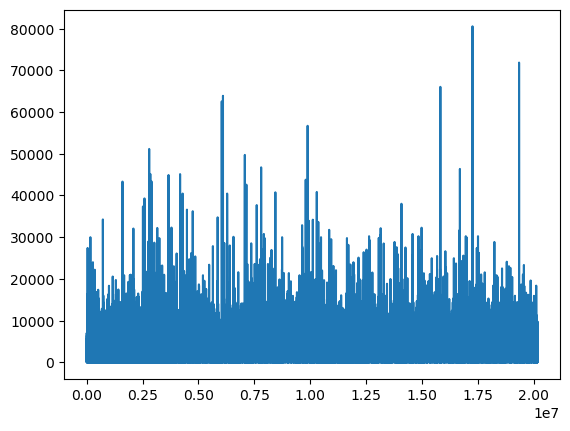

In [57]:
f1902['trip_time'].plot()

In [61]:
f1902 = f1902[f1902.trip_time>0]

In [62]:
f1902.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [80]:
f1902.trip_time

0            579
1            490
2           2159
3            179
4           1799
            ... 
20159097    2220
20159098    3026
20159099    1053
20159100    2125
20159101    1466
Name: trip_time, Length: 19952833, dtype: int64

## 6) base_passenger_fare

In [63]:
f1902[f1902.base_passenger_fare<=0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
34,HV0003,B02887,B02887,2019-02-01 00:35:30,2019-02-01 00:37:19,2019-02-01 00:40:06,2019-02-01 00:45:21,239,151,2.4150,...,0.00,0.00,NaN,0.0,5.98,Y,Y,N,N,NaN
1064,HV0003,B02764,B02764,2019-02-01 00:52:17,2019-02-01 00:52:27,2019-02-01 00:53:30,2019-02-01 00:58:01,75,75,2.0125,...,0.38,0.00,NaN,2.0,7.60,N,N,N,N,NaN
1078,HV0003,B02864,B02864,2019-02-01 00:23:00,2019-02-01 00:23:33,2019-02-01 00:26:17,2019-02-01 00:46:21,80,87,9.8210,...,1.75,0.00,NaN,0.0,16.91,N,N,N,N,NaN
1535,HV0003,B02765,B02765,2019-02-01 00:40:33,2019-02-01 00:40:36,2019-02-01 00:41:46,2019-02-01 00:45:33,256,255,1.0143,...,0.64,0.00,NaN,0.0,5.56,N,N,N,N,NaN
1810,HV0003,B02870,B02870,2019-02-01 00:17:40,2019-02-01 00:20:08,2019-02-01 00:24:29,2019-02-01 00:35:02,145,202,3.1717,...,0.40,0.00,NaN,0.0,7.51,Y,N,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20158329,HV0003,B02883,B02883,2019-02-28 23:39:05,2019-02-28 23:41:19,2019-02-28 23:46:13,2019-03-01 00:31:52,35,10,21.7672,...,3.32,0.00,NaN,0.0,28.05,Y,Y,N,N,NaN
20158850,HV0003,B02889,B02889,2019-02-28 23:16:35,2019-02-28 23:17:51,2019-02-28 23:18:38,2019-02-28 23:28:59,200,200,3.6064,...,0.00,0.00,NaN,0.0,0.00,Y,Y,N,N,NaN
20158981,HV0003,B02617,B02617,2019-02-28 23:09:57,2019-02-28 23:17:25,2019-02-28 23:18:19,2019-03-01 00:09:24,68,247,13.0893,...,1.43,0.75,NaN,0.0,35.53,Y,Y,N,N,NaN
20159022,HV0003,B02872,B02872,2019-02-28 23:55:27,2019-02-28 23:56:11,2019-02-28 23:59:07,2019-03-01 00:32:26,147,265,20.3665,...,0.00,0.00,NaN,0.0,57.20,N,N,N,N,NaN


In [65]:
f1902 = f1902[f1902.base_passenger_fare>0]

## 7) congestion_surcharge & airport_fee

In [71]:
f1902[f1902.congestion_surcharge.isna()]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
13,HV0002,B02914,B02914,2019-02-01 00:05:50,NaT,2019-02-01 00:10:09,2019-02-01 00:31:04,161,33,11.1573,...,1.71,NaN,NaN,3.55,17.71,N,N,N,N,NaN
21,HV0002,B02914,B02914,2019-02-01 00:24:30,NaT,2019-02-01 00:30:07,2019-02-01 00:49:48,113,48,6.1824,...,1.10,NaN,NaN,0.00,11.85,N,N,N,N,NaN
50,HV0002,B02914,B02914,2019-02-01 00:41:53,NaT,2019-02-01 00:44:45,2019-02-01 00:52:54,209,144,2.4472,...,0.69,NaN,NaN,0.00,6.50,N,N,N,N,NaN
51,HV0002,B02914,B02914,2019-02-01 00:53:54,NaT,2019-02-01 00:55:40,2019-02-01 01:19:37,114,36,9.8854,...,1.48,NaN,NaN,5.17,15.87,N,N,N,N,NaN
80,HV0002,B02914,B02914,2019-02-01 00:54:25,NaT,2019-02-01 00:57:00,2019-02-01 01:13:01,13,239,8.2754,...,2.68,NaN,NaN,0.00,26.86,N,N,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359007,HV0002,B02914,B02914,2019-02-24 23:39:44,NaT,2019-02-24 23:46:37,2019-02-24 23:53:21,7,7,1.8193,...,0.50,NaN,NaN,1.55,6.25,N,N,N,N,NaN
17359090,HV0002,B02914,B02914,2019-02-24 23:19:56,NaT,2019-02-24 23:24:02,2019-02-24 23:31:15,61,177,2.6243,...,0.60,NaN,NaN,0.00,5.86,N,N,N,N,NaN
17359091,HV0002,B02914,B02914,2019-02-24 23:27:26,NaT,2019-02-24 23:35:51,2019-02-24 23:41:01,177,177,1.3363,...,0.44,NaN,NaN,0.00,5.86,N,N,N,N,NaN
17359092,HV0002,B02914,B02914,2019-02-24 23:35:55,NaT,2019-02-24 23:49:31,2019-02-24 23:57:45,177,225,3.2039,...,0.68,NaN,NaN,0.00,7.02,N,N,N,N,NaN


In [72]:
f1902[f1902.airport_fee.isna()]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02867,B02867,2019-02-01 00:01:26,2019-02-01 00:02:55,2019-02-01 00:05:18,2019-02-01 00:14:57,245,251,3.9445,...,0.83,0.00,NaN,0.0,7.48,Y,N,N,N,NaN
1,HV0003,B02879,B02879,2019-02-01 00:26:08,2019-02-01 00:41:29,2019-02-01 00:41:29,2019-02-01 00:49:39,216,197,2.7531,...,0.70,0.00,NaN,2.0,7.93,N,N,N,N,NaN
2,HV0005,B02510,None,2019-02-01 00:48:58,NaT,2019-02-01 00:51:34,2019-02-01 01:28:29,261,234,8.0661,...,3.99,0.00,NaN,0.0,35.97,N,Y,N,N,NaN
3,HV0005,B02510,None,2019-02-01 00:02:15,NaT,2019-02-01 00:03:51,2019-02-01 00:07:16,87,87,0.5474,...,0.64,0.00,NaN,3.0,5.39,N,Y,N,N,NaN
4,HV0005,B02510,None,2019-02-01 00:06:17,NaT,2019-02-01 00:09:44,2019-02-01 00:39:56,87,198,11.0124,...,2.16,0.00,NaN,4.0,17.07,N,Y,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20159097,HV0005,B02510,None,2019-02-28 23:18:35,NaT,2019-02-28 23:23:40,2019-03-01 00:01:32,181,239,15.5204,...,3.84,2.75,NaN,0.0,29.30,N,N,N,N,NaN
20159098,HV0003,B02395,B02395,2019-02-28 23:04:43,2019-02-28 23:08:45,2019-02-28 23:10:43,2019-03-01 00:01:08,244,225,25.0999,...,0.00,0.00,NaN,0.0,27.51,Y,Y,N,N,NaN
20159099,HV0003,B02395,B02395,2019-02-28 23:06:47,2019-02-28 23:12:45,2019-02-28 23:13:47,2019-02-28 23:31:21,244,7,10.1269,...,0.00,0.00,NaN,0.0,11.43,Y,Y,N,N,NaN
20159100,HV0003,B02395,B02395,2019-02-28 23:33:24,2019-02-28 23:37:53,2019-02-28 23:40:31,2019-03-01 00:15:56,260,61,12.6385,...,0.00,0.00,NaN,0.0,13.29,Y,Y,N,N,NaN


In [74]:
f1902['congestion_surcharge']=f1902.congestion_surcharge.fillna(0.0)
f1902['airport_fee'] = f1902.airport_fee.fillna(0.0)

## 8) driver_pay

In [76]:
f1902.head(10)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02867,B02867,2019-02-01 00:01:26,2019-02-01 00:02:55,2019-02-01 00:05:18,2019-02-01 00:14:57,245,251,3.9445,...,0.83,0.0,0.0,0.0,7.48,Y,N,N,N,NaN
1,HV0003,B02879,B02879,2019-02-01 00:26:08,2019-02-01 00:41:29,2019-02-01 00:41:29,2019-02-01 00:49:39,216,197,2.7531,...,0.70,0.0,0.0,2.0,7.93,N,N,N,N,NaN
2,HV0005,B02510,None,2019-02-01 00:48:58,NaT,2019-02-01 00:51:34,2019-02-01 01:28:29,261,234,8.0661,...,3.99,0.0,0.0,0.0,35.97,N,Y,N,N,NaN
3,HV0005,B02510,None,2019-02-01 00:02:15,NaT,2019-02-01 00:03:51,2019-02-01 00:07:16,87,87,0.5474,...,0.64,0.0,0.0,3.0,5.39,N,Y,N,N,NaN
4,HV0005,B02510,None,2019-02-01 00:06:17,NaT,2019-02-01 00:09:44,2019-02-01 00:39:56,87,198,11.0124,...,2.16,0.0,0.0,4.0,17.07,N,Y,N,N,NaN
5,HV0005,B02510,None,2019-02-01 00:56:01,NaT,2019-02-01 00:59:55,2019-02-01 01:06:28,198,198,1.7871,...,0.51,0.0,0.0,0.0,0.00,Y,Y,N,N,NaN
6,HV0005,B02510,None,2019-02-01 00:07:17,NaT,2019-02-01 00:12:06,2019-02-01 00:42:13,161,148,7.2933,...,1.45,0.0,0.0,0.0,14.31,N,Y,N,N,NaN
7,HV0005,B02510,None,2019-02-01 00:43:33,NaT,2019-02-01 00:45:35,2019-02-01 01:14:56,148,21,18.0964,...,2.71,0.0,0.0,0.0,22.09,N,Y,N,N,NaN
8,HV0003,B02867,B02867,2019-02-01 00:00:35,2019-02-01 00:09:33,2019-02-01 00:10:48,2019-02-01 00:20:23,226,260,2.5599,...,0.62,0.0,0.0,0.0,6.51,Y,N,N,N,NaN
9,HV0003,B02867,B02867,2019-02-01 00:29:16,2019-02-01 00:31:21,2019-02-01 00:32:32,2019-02-01 00:40:25,7,223,3.0590,...,0.63,0.0,0.0,0.0,6.01,Y,N,N,N,NaN


In [77]:
f1902.loc[0,:]

hvfhs_license_num                    HV0003
dispatching_base_num                 B02867
originating_base_num                 B02867
request_datetime        2019-02-01 00:01:26
on_scene_datetime       2019-02-01 00:02:55
pickup_datetime         2019-02-01 00:05:18
dropoff_datetime        2019-02-01 00:14:57
PULocationID                            245
DOLocationID                            251
trip_distance                        3.9445
trip_time                               579
base_passenger_fare                    9.35
tolls                                   0.0
bcf                                    0.23
sales_tax                              0.83
congestion_surcharge                    0.0
airport_fee                             0.0
tips                                    0.0
driver_pay                             7.48
shared_request_flag                       Y
shared_match_flag                         N
access_a_ride_flag                        N
wav_request_flag                

In [90]:
f1902[f1902.driver_pay<=0]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
5,HV0005,B02510,None,2019-02-01 00:56:01,NaT,2019-02-01 00:59:55,2019-02-01 01:06:28,198,198,1.7871,...,0.00,0.0,0.0,0.0,Y,Y,N,N,NaN,17.920780
40,HV0005,B02510,None,2019-02-01 00:25:36,NaT,2019-02-01 00:34:40,2019-02-01 00:40:25,7,223,1.8515,...,0.00,0.0,0.0,0.0,Y,Y,N,N,NaN,22.292308
59,HV0005,B02510,None,2019-02-01 00:14:22,NaT,2019-02-01 00:18:28,2019-02-01 00:27:01,79,90,2.7531,...,0.00,0.0,2.0,0.0,Y,Y,N,N,NaN,20.691357
145,HV0005,B02510,None,2019-02-01 00:23:26,NaT,2019-02-01 00:26:10,2019-02-01 00:58:45,80,74,17.0499,...,0.00,0.0,0.0,0.0,Y,Y,N,N,NaN,31.985221
228,HV0005,B02510,None,2019-02-01 00:11:24,NaT,2019-02-01 00:21:25,2019-02-01 00:36:39,90,79,3.3488,...,0.00,0.0,0.0,0.0,Y,Y,N,N,NaN,13.410100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20159012,HV0005,B02510,None,2019-02-28 23:38:14,NaT,2019-02-28 23:42:44,2019-03-01 00:08:18,100,152,9.6117,...,0.75,0.0,0.0,0.0,Y,Y,N,N,NaN,23.068080
20159013,HV0005,B02510,None,2019-02-28 23:37:11,NaT,2019-02-28 23:49:46,2019-03-01 00:03:35,230,166,7.2289,...,0.75,0.0,0.0,0.0,Y,Y,N,N,NaN,33.364154
20159020,HV0004,B02800,None,2019-02-28 23:08:56,NaT,2019-02-28 23:12:19,2019-02-28 23:37:21,238,243,8.6457,...,0.75,0.0,0.0,0.0,Y,Y,N,N,NaN,20.722051
20159021,HV0004,B02800,None,2019-02-28 23:36:41,NaT,2019-02-28 23:46:13,2019-02-28 23:52:03,243,127,1.4973,...,0.00,0.0,0.0,0.0,Y,N,N,N,NaN,15.400800


In [91]:
f1902.loc[5]

hvfhs_license_num                    HV0005
dispatching_base_num                 B02510
originating_base_num                   None
request_datetime        2019-02-01 00:56:01
on_scene_datetime                       NaT
pickup_datetime         2019-02-01 00:59:55
dropoff_datetime        2019-02-01 01:06:28
PULocationID                            198
DOLocationID                            198
trip_distance                        1.7871
trip_time                               359
base_passenger_fare                    5.75
tolls                                   0.0
bcf                                    0.14
sales_tax                              0.51
congestion_surcharge                    0.0
airport_fee                             0.0
tips                                    0.0
driver_pay                              0.0
shared_request_flag                       Y
shared_match_flag                         Y
access_a_ride_flag                        N
wav_request_flag                

## 9) average speed

In [81]:
f1902['average_speed'] = f1902.apply(lambda x: x['trip_distance']/(x['trip_time']/60/60),axis=1)
q1=f1902['average_speed'].quantile(0.25)
q3=f1902['average_speed'].quantile(0.75)
iqr=q3-q1

In [83]:
f1902[(f1902.average_speed<(q1-1.5*iqr)) | (f1902.average_speed>(q3+1.5*iqr))]

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,...,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,average_speed
36,HV0003,B02764,B02764,2019-02-01 00:30:29,2019-02-01 00:36:26,2019-02-01 00:36:56,2019-02-01 00:55:14,132,39,16.7762,...,0.0,0.0,0.0,20.74,Y,N,N,N,NaN,55.054075
43,HV0003,B02879,B02879,2019-01-31 23:56:15,2019-02-01 00:05:37,2019-02-01 00:05:45,2019-02-01 00:19:24,138,145,11.3344,...,0.0,0.0,1.0,15.75,N,N,N,N,NaN,49.821538
82,HV0003,B02880,B02880,2019-02-01 00:52:11,2019-02-01 00:53:25,2019-02-01 00:55:16,2019-02-01 01:21:27,89,260,22.8942,...,0.0,0.0,0.0,37.34,N,N,N,N,NaN,52.429466
83,HV0003,B02764,B02764,2019-02-01 00:05:31,2019-02-01 00:09:45,2019-02-01 00:12:04,2019-02-01 00:47:00,164,265,26.7260,...,0.0,0.0,0.0,57.22,N,N,N,N,NaN,45.903435
89,HV0003,B02888,B02888,2019-02-01 00:20:39,2019-02-01 00:32:21,2019-02-01 00:34:06,2019-02-01 00:46:19,7,56,9.3541,...,0.0,0.0,0.0,7.16,Y,Y,N,N,NaN,46.003770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20159066,HV0003,B02836,B02836,2019-02-28 23:40:13,2019-02-28 23:40:28,2019-02-28 23:42:45,2019-03-01 00:10:44,146,132,23.4255,...,0.0,0.0,0.0,29.82,N,N,N,N,NaN,50.197500
20159089,HV0003,B02880,B02880,2019-02-28 23:01:51,2019-02-28 23:03:41,2019-02-28 23:05:01,2019-02-28 23:20:43,226,92,12.0267,...,0.0,0.0,0.0,15.98,N,N,N,N,NaN,45.913171
20159091,HV0003,B02880,B02880,2019-02-28 23:45:06,2019-02-28 23:51:09,2019-02-28 23:53:25,2019-03-01 00:15:35,252,265,24.8906,...,0.0,0.0,0.0,34.66,N,N,N,N,NaN,67.322434
20159092,HV0003,B02878,B02878,2019-02-28 23:32:57,2019-02-28 23:33:12,2019-02-28 23:36:25,2019-03-01 00:13:17,235,228,32.1839,...,0.0,0.0,0.0,45.94,N,N,N,N,NaN,52.378861


In [85]:
f1902.average_speed.describe()

count    1.995283e+07
mean     2.197532e+01
std      1.160441e+01
min      2.489798e-03
25%      1.425021e+01
50%      1.886156e+01
75%      2.625745e+01
max      2.171044e+03
Name: average_speed, dtype: float64

In [89]:
f1902 = f1902[(f1902.average_speed>(q1-1.5*iqr)) & (f1902.average_speed<(q3+1.5*iqr))]
len(f1902)

18771624

# -2. Data processing with f1901

In [94]:
f1901 = pd.read_parquet("D:/Working_Place/new_uber/data/fhv_tripdata_2019-01.parquet")
f1901.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00001,2019-01-01 00:30:00,2019-01-01 02:51:55,NaN,NaN,NaN,B00001
1,B00001,2019-01-01 00:45:00,2019-01-01 00:54:49,NaN,NaN,NaN,B00001
2,B00001,2019-01-01 00:15:00,2019-01-01 00:54:52,NaN,NaN,NaN,B00001
3,B00008,2019-01-01 00:19:00,2019-01-01 00:39:00,NaN,NaN,NaN,B00008
4,B00008,2019-01-01 00:27:00,2019-01-01 00:37:00,NaN,NaN,NaN,B00008


Shit!

# -3. Data processing with all data

In [2]:
def dataprocessing(df,year,month):
    print("I'm doing dataprocessing with {}-{} data".format(year,month))
    print("Original length is : ", len(df))
    
    ##1) datetime
    df1 = df[df.request_datetime.notnull()]
    print("After datetime processing : ", len(df1))
    
    ##2) trip_mile
    df1 = df1[df1.trip_miles>0]
    df1['trip_miles'] = df1['trip_miles']*1.61
    df1.rename(columns={'trip_miles' : 'trip_distance'},inplace=True)
    print("After trip_mile processing : ", len(df1))
    
    ##3) trip_time
    df1 = df1[df1.trip_time>0]
    print("After trip_time processing : ", len(df1))
    
    ##4) base_passenger_fare
    df1 = df1[df1.base_passenger_fare>0]
    print("After base_passenger_fare : ", len(df1))
    
    ##5) congeestion_surcharge&airport_fee
    df1['congestion_surcharge']=df1.congestion_surcharge.fillna(0.0)
    df1['airport_fee'] = df1.airport_fee.fillna(0.0)
    
    ##6) average speed
    df1['average_speed'] = df1.apply(lambda x: x['trip_distance']/(x['trip_time']/60/60),axis=1)
    q1=df1['average_speed'].quantile(0.25)
    q3=df1['average_speed'].quantile(0.75)
    iqr=q3-q1
    df1 = df1[(df1.average_speed>(q1-1.5*iqr)) & (df1.average_speed<(q3+1.5*iqr))]
    print("After average_speed : ", len(df1))
    
    yearname = str(year%2000)
    if month<10:
        monthname = "0"+str(month)
    else:
        monthname = str(month)
    print("Saving to data_processed!")
    df1.to_parquet('D:/Working_Place/new_uber/data/data_processed/f{}{}.parquet'.format(yearname,monthname))
    return df1

In [3]:
count=0
for i in [2019,2020,2021,2022]:
    for j in tqdm(range(1,13)):
        if count<1:
            count+=1
            continue
        if j>=10:
            dataframe_fhvhv = pd.read_parquet("D:/Working_Place/new_uber/data/fhvhv_tripdata_{}-{}.parquet".format(i,j))
        else:
            dataframe_fhvhv = pd.read_parquet("D:/Working_Place/new_uber/data/fhvhv_tripdata_{}-{}.parquet".format(i,"0"+str(j)))
        dataprocessing(dataframe_fhvhv,i,j)
        del dataframe_fhvhv

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

I'm doing dataprocessing with 2019-2 data
Original length is :  20159102
After datetime processing :  20050204
After trip_mile processing :  20043752
After trip_time processing :  20041520
After base_passenger_fare :  19952833
After average_speed :  18771624
Saving to data_processed!


 17%|█████████████▋                                                                    | 2/12 [07:05<35:28, 212.84s/it]

I'm doing dataprocessing with 2019-3 data
Original length is :  23864598
After datetime processing :  23864575
After trip_mile processing :  23853245
After trip_time processing :  23850038
After base_passenger_fare :  23773879
After average_speed :  22386297
Saving to data_processed!


 25%|████████████████████▌                                                             | 3/12 [15:33<50:20, 335.59s/it]

I'm doing dataprocessing with 2019-4 data
Original length is :  21734822
After datetime processing :  21734822
After trip_mile processing :  21716875
After trip_time processing :  21714353
After base_passenger_fare :  21642868
After average_speed :  20399017
Saving to data_processed!


 33%|███████████████████████████▎                                                      | 4/12 [23:09<50:44, 380.52s/it]

I'm doing dataprocessing with 2019-5 data
Original length is :  22329247
After datetime processing :  22329242
After trip_mile processing :  22319212
After trip_time processing :  22318882
After base_passenger_fare :  22254374
After average_speed :  20946386
Saving to data_processed!


 42%|██████████████████████████████████▏                                               | 5/12 [31:16<48:43, 417.58s/it]

I'm doing dataprocessing with 2019-6 data
Original length is :  21001990
After datetime processing :  21001990
After trip_mile processing :  20993410
After trip_time processing :  20993401
After base_passenger_fare :  20943916
After average_speed :  19734481
Saving to data_processed!


 50%|█████████████████████████████████████████                                         | 6/12 [38:50<42:58, 429.75s/it]

I'm doing dataprocessing with 2019-7 data
Original length is :  20303312
After datetime processing :  20303312
After trip_mile processing :  20297728
After trip_time processing :  20297725
After base_passenger_fare :  19573857
After average_speed :  18491478
Saving to data_processed!


 58%|███████████████████████████████████████████████▊                                  | 7/12 [45:43<35:22, 424.51s/it]

I'm doing dataprocessing with 2019-8 data
Original length is :  20126113
After datetime processing :  20126113
After trip_mile processing :  20120452
After trip_time processing :  20120450
After base_passenger_fare :  17764980
After average_speed :  16840202
Saving to data_processed!


 67%|██████████████████████████████████████████████████████▋                           | 8/12 [51:57<27:14, 408.63s/it]

I'm doing dataprocessing with 2019-9 data
Original length is :  20069321
After datetime processing :  20069320
After trip_mile processing :  20049396
After trip_time processing :  20049393
After base_passenger_fare :  19995344
After average_speed :  18856229
Saving to data_processed!


 75%|█████████████████████████████████████████████████████████████▌                    | 9/12 [59:03<20:41, 413.80s/it]

I'm doing dataprocessing with 2019-10 data
Original length is :  21162290
After datetime processing :  21162290
After trip_mile processing :  21147391
After trip_time processing :  21147389
After base_passenger_fare :  21096232
After average_speed :  19912306
Saving to data_processed!


 83%|█████████████████████████████████████████████████████████████████▊             | 10/12 [1:06:36<14:11, 425.76s/it]

I'm doing dataprocessing with 2019-11 data
Original length is :  21635568
After datetime processing :  21635568
After trip_mile processing :  21620478
After trip_time processing :  21620468
After base_passenger_fare :  21573267
After average_speed :  20326724
Saving to data_processed!


 92%|████████████████████████████████████████████████████████████████████████▍      | 11/12 [1:14:18<07:16, 436.94s/it]

I'm doing dataprocessing with 2019-12 data
Original length is :  22243901
After datetime processing :  22243901
After trip_mile processing :  21845498
After trip_time processing :  21845494
After base_passenger_fare :  21765253
After average_speed :  20511511
Saving to data_processed!


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

I'm doing dataprocessing with 2020-1 data
Original length is :  20569368
After datetime processing :  20569368
After trip_mile processing :  20440835
After trip_time processing :  20440828
After base_passenger_fare :  20405524
After average_speed :  19244030
Saving to data_processed!


  8%|██████▋                                                                         | 1/12 [07:21<1:20:59, 441.79s/it]

I'm doing dataprocessing with 2020-2 data
Original length is :  21725100
After datetime processing :  21725100
After trip_mile processing :  21720962
After trip_time processing :  21720960
After base_passenger_fare :  21681189
After average_speed :  20426480
Saving to data_processed!


 17%|█████████████▎                                                                  | 2/12 [15:14<1:16:37, 459.80s/it]

I'm doing dataprocessing with 2020-3 data
Original length is :  13392928
After datetime processing :  13392928
After trip_mile processing :  13391482
After trip_time processing :  13391479
After base_passenger_fare :  13368312
After average_speed :  12658052
Saving to data_processed!


 25%|████████████████████▌                                                             | 3/12 [19:45<56:04, 373.85s/it]

I'm doing dataprocessing with 2020-4 data
Original length is :  4312909
After datetime processing :  4312909
After trip_mile processing :  4312181
After trip_time processing :  4312181
After base_passenger_fare :  4305628
After average_speed :  4208974
Saving to data_processed!


 33%|███████████████████████████▎                                                      | 4/12 [21:12<34:44, 260.50s/it]

I'm doing dataprocessing with 2020-5 data
Original length is :  6089999
After datetime processing :  6089998
After trip_mile processing :  6088761
After trip_time processing :  6088761
After base_passenger_fare :  6077443
After average_speed :  5887007
Saving to data_processed!


 42%|██████████████████████████████████▏                                               | 5/12 [23:15<24:35, 210.85s/it]

I'm doing dataprocessing with 2020-6 data
Original length is :  7555193
After datetime processing :  7555193
After trip_mile processing :  7553647
After trip_time processing :  7553647
After base_passenger_fare :  7540196
After average_speed :  7252884
Saving to data_processed!


 50%|█████████████████████████████████████████                                         | 6/12 [25:51<19:13, 192.18s/it]

I'm doing dataprocessing with 2020-7 data
Original length is :  9958454
After datetime processing :  9958454
After trip_mile processing :  9956098
After trip_time processing :  9956097
After base_passenger_fare :  9946367
After average_speed :  9502907
Saving to data_processed!


 58%|███████████████████████████████████████████████▊                                  | 7/12 [29:12<16:15, 195.15s/it]

I'm doing dataprocessing with 2020-8 data
Original length is :  11096852
After datetime processing :  11096851
After trip_mile processing :  11094547
After trip_time processing :  11094546
After base_passenger_fare :  11081110
After average_speed :  10560698
Saving to data_processed!


 67%|██████████████████████████████████████████████████████▋                           | 8/12 [32:56<13:36, 204.22s/it]

I'm doing dataprocessing with 2020-9 data
Original length is :  12106669
After datetime processing :  12106666
After trip_mile processing :  12104766
After trip_time processing :  12104766
After base_passenger_fare :  12086182
After average_speed :  11470622
Saving to data_processed!


 75%|█████████████████████████████████████████████████████████████▌                    | 9/12 [36:58<10:48, 216.15s/it]

I'm doing dataprocessing with 2020-10 data
Original length is :  13268411
After datetime processing :  13268408
After trip_mile processing :  13265613
After trip_time processing :  13265613
After base_passenger_fare :  13246711
After average_speed :  12527819
Saving to data_processed!


 83%|███████████████████████████████████████████████████████████████████▌             | 10/12 [41:25<07:43, 231.69s/it]

I'm doing dataprocessing with 2020-11 data
Original length is :  11596865
After datetime processing :  11596856
After trip_mile processing :  11594491
After trip_time processing :  11594491
After base_passenger_fare :  11579335
After average_speed :  10969941
Saving to data_processed!


 92%|██████████████████████████████████████████████████████████████████████████▎      | 11/12 [45:17<03:51, 231.92s/it]

I'm doing dataprocessing with 2020-12 data
Original length is :  11637123
After datetime processing :  11637114
After trip_mile processing :  11634035
After trip_time processing :  11634035
After base_passenger_fare :  11617408
After average_speed :  11008004
Saving to data_processed!


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

I'm doing dataprocessing with 2021-1 data
Original length is :  11908468
After datetime processing :  11908464
After trip_mile processing :  11906009
After trip_time processing :  11906009
After base_passenger_fare :  11890538
After average_speed :  11299010
Saving to data_processed!


  8%|██████▊                                                                           | 1/12 [04:00<44:04, 240.37s/it]

I'm doing dataprocessing with 2021-2 data
Original length is :  11613942
After datetime processing :  11613941
After trip_mile processing :  11611149
After trip_time processing :  11611149
After base_passenger_fare :  11582314
After average_speed :  10981789
Saving to data_processed!


 17%|█████████████▋                                                                    | 2/12 [07:55<39:33, 237.31s/it]

I'm doing dataprocessing with 2021-3 data
Original length is :  14227393
After datetime processing :  14227393
After trip_mile processing :  14224182
After trip_time processing :  14224182
After base_passenger_fare :  14195798
After average_speed :  13436205
Saving to data_processed!


 25%|████████████████████▌                                                             | 3/12 [12:44<39:07, 260.84s/it]

I'm doing dataprocessing with 2021-4 data
Original length is :  14111371
After datetime processing :  14111371
After trip_mile processing :  14103882
After trip_time processing :  14103799
After base_passenger_fare :  14069543
After average_speed :  13299282
Saving to data_processed!


 33%|███████████████████████████▎                                                      | 4/12 [17:31<36:08, 271.03s/it]

I'm doing dataprocessing with 2021-5 data
Original length is :  14719171
After datetime processing :  14719171
After trip_mile processing :  14711259
After trip_time processing :  14711254
After base_passenger_fare :  14683292
After average_speed :  13885988
Saving to data_processed!


 42%|██████████████████████████████████▏                                               | 5/12 [22:30<32:47, 281.11s/it]

I'm doing dataprocessing with 2021-6 data
Original length is :  14961892
After datetime processing :  14961892
After trip_mile processing :  14955702
After trip_time processing :  14955699
After base_passenger_fare :  14906719
After average_speed :  14089549
Saving to data_processed!


 50%|█████████████████████████████████████████                                         | 6/12 [27:36<28:57, 289.62s/it]

I'm doing dataprocessing with 2021-7 data
Original length is :  15027174
After datetime processing :  15027174
After trip_mile processing :  15021589
After trip_time processing :  15021588
After base_passenger_fare :  14991173
After average_speed :  14239267
Saving to data_processed!


 58%|███████████████████████████████████████████████▊                                  | 7/12 [32:43<24:36, 295.38s/it]

I'm doing dataprocessing with 2021-8 data
Original length is :  14499696
After datetime processing :  14499696
After trip_mile processing :  14496173
After trip_time processing :  14496147
After base_passenger_fare :  14467540
After average_speed :  13776449
Saving to data_processed!


 67%|██████████████████████████████████████████████████████▋                           | 8/12 [37:35<19:37, 294.36s/it]

I'm doing dataprocessing with 2021-9 data
Original length is :  14886055
After datetime processing :  14886055
After trip_mile processing :  14882605
After trip_time processing :  14882577
After base_passenger_fare :  14841939
After average_speed :  14044510
Saving to data_processed!


 75%|█████████████████████████████████████████████████████████████▌                    | 9/12 [42:39<14:52, 297.43s/it]

I'm doing dataprocessing with 2021-10 data
Original length is :  16545356
After datetime processing :  16545356
After trip_mile processing :  16541741
After trip_time processing :  16541734
After base_passenger_fare :  16505328
After average_speed :  15600711
Saving to data_processed!


 83%|███████████████████████████████████████████████████████████████████▌             | 10/12 [48:21<10:22, 311.01s/it]

I'm doing dataprocessing with 2021-11 data
Original length is :  16041639
After datetime processing :  16041639
After trip_mile processing :  16038151
After trip_time processing :  16038151
After base_passenger_fare :  15999145
After average_speed :  15135331
Saving to data_processed!


 92%|██████████████████████████████████████████████████████████████████████████▎      | 11/12 [53:49<05:16, 316.31s/it]

I'm doing dataprocessing with 2021-12 data
Original length is :  16054495
After datetime processing :  16054495
After trip_mile processing :  16051059
After trip_time processing :  16051059
After base_passenger_fare :  16017010
After average_speed :  15213042
Saving to data_processed!


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

I'm doing dataprocessing with 2022-1 data
Original length is :  14751591
After datetime processing :  14751591
After trip_mile processing :  14748877
After trip_time processing :  14748876
After base_passenger_fare :  14723576
After average_speed :  13953776
Saving to data_processed!


  8%|██████▊                                                                           | 1/12 [05:07<56:23, 307.60s/it]

I'm doing dataprocessing with 2022-2 data
Original length is :  16019283
After datetime processing :  16019283
After trip_mile processing :  16016166
After trip_time processing :  16016166
After base_passenger_fare :  15989952
After average_speed :  15095370
Saving to data_processed!


 17%|█████████████▋                                                                    | 2/12 [10:39<53:36, 321.68s/it]

I'm doing dataprocessing with 2022-3 data
Original length is :  18453548
After datetime processing :  18453548
After trip_mile processing :  18450245
After trip_time processing :  18450245
After base_passenger_fare :  18429755
After average_speed :  17429712
Saving to data_processed!


 25%|████████████████████▌                                                             | 3/12 [17:05<52:39, 351.05s/it]

I'm doing dataprocessing with 2022-4 data
Original length is :  17752561
After datetime processing :  17752561
After trip_mile processing :  17749191
After trip_time processing :  17749191
After base_passenger_fare :  17729038
After average_speed :  16804209
Saving to data_processed!


 33%|███████████████████████████▎                                                      | 4/12 [23:09<47:31, 356.43s/it]

I'm doing dataprocessing with 2022-5 data
Original length is :  18157335
After datetime processing :  18157335
After trip_mile processing :  18152179
After trip_time processing :  18152179
After base_passenger_fare :  18126738
After average_speed :  17174076
Saving to data_processed!


 42%|██████████████████████████████████▏                                               | 5/12 [29:17<42:02, 360.41s/it]

I'm doing dataprocessing with 2022-6 data
Original length is :  17780075
After datetime processing :  17780075
After trip_mile processing :  17776132
After trip_time processing :  17776132
After base_passenger_fare :  17750180
After average_speed :  16817586
Saving to data_processed!


 50%|█████████████████████████████████████████                                         | 6/12 [35:27<36:21, 363.58s/it]

I'm doing dataprocessing with 2022-7 data
Original length is :  17464619
After datetime processing :  17464619
After trip_mile processing :  17461453
After trip_time processing :  17461453
After base_passenger_fare :  17441628
After average_speed :  16639551
Saving to data_processed!


 58%|███████████████████████████████████████████████▊                                  | 7/12 [41:24<30:07, 361.59s/it]

I'm doing dataprocessing with 2022-8 data
Original length is :  17185687
After datetime processing :  17185687
After trip_mile processing :  17182605
After trip_time processing :  17182605
After base_passenger_fare :  17157530
After average_speed :  16376526
Saving to data_processed!


 67%|██████████████████████████████████████████████████████▋                           | 8/12 [47:11<23:47, 356.97s/it]

I'm doing dataprocessing with 2022-9 data
Original length is :  17793551
After datetime processing :  17793551
After trip_mile processing :  17790166
After trip_time processing :  17790166
After base_passenger_fare :  17767445
After average_speed :  16799787
Saving to data_processed!


 75%|█████████████████████████████████████████████████████████████▌                    | 9/12 [53:14<17:56, 358.89s/it]

I'm doing dataprocessing with 2022-10 data
Original length is :  19306090
After datetime processing :  19306090
After trip_mile processing :  19301886
After trip_time processing :  19301886
After base_passenger_fare :  19275502
After average_speed :  18222687
Saving to data_processed!


 83%|███████████████████████████████████████████████████████████████████▌             | 10/12 [59:47<12:18, 369.27s/it]

I'm doing dataprocessing with 2022-11 data
Original length is :  18085896
After datetime processing :  18085896
After trip_mile processing :  18081996
After trip_time processing :  18081996
After base_passenger_fare :  18064253
After average_speed :  17063154
Saving to data_processed!


 92%|████████████████████████████████████████████████████████████████████████▍      | 11/12 [1:05:57<06:09, 369.57s/it]

I'm doing dataprocessing with 2022-12 data
Original length is :  19665847
After datetime processing :  19665847
After trip_mile processing :  19661742
After trip_time processing :  19661742
After base_passenger_fare :  19644879
After average_speed :  18562117
Saving to data_processed!


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [1:12:38<00:00, 363.21s/it]
